# 🎓 Árvore de Decisão Classificação (Decision Tree Classifier)


### Sobre o exercício
Neste exercício de laboratório, você aprenderá um algoritmo popular de aprendizado de máquina, a árvore de decisão. 

Você usará este algoritmo de classificação para construir um modelo a partir de dados históricos de pacientes e sua resposta a diferentes medicamentos. 

Em seguida, você usa a árvore de decisão treinada para prever a classe de um paciente desconhecido ou para encontrar um medicamento adequado para um novo paciente.

### Sobre o Dataset
Imagine que você seja um pesquisador médico compilando dados para um estudo. Você coletou dados sobre um conjunto de pacientes, todos com a mesma doença. Durante o curso do tratamento, cada paciente respondeu a um dos 5 medicamentos, medicamento A, medicamento B, medicamento c, medicamento X e Y.

Parte do seu trabalho é construir um modelo para descobrir qual medicamento pode ser apropriado para um futuro paciente com a mesma doença. Os conjuntos de recursos desse conjunto de dados são idade, sexo, pressão arterial e colesterol dos pacientes, e o alvo é o medicamento ao qual cada paciente respondeu.

É um exemplo de classificador binário e você pode usá-lo para construir uma árvore de decisão e, em seguida, usá-la para prever a classe de um paciente desconhecido ou prescrevê-la para um novo paciente.

## Importação dos dados

In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np

1) Importe o dataset usando o pandas:

In [2]:
url = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/drug200.csv'
df = pd.read_csv(url)
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


Confira se a importação foi bem sucedida ao executar o método `head()`. 

In [3]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


## Pré-processamento

Declare duas variáveis:
* `X` para as features
* `y` para o target (`Drug`)

2) Preencha o bloco abaixo com um Dataframe para as features somente

In [4]:
X = df.drop(['Drug'], axis=1)
X

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043
...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567
196,16,M,LOW,HIGH,12.006
197,52,M,NORMAL,HIGH,9.894
198,23,M,NORMAL,NORMAL,14.020


3) Preencha o bloco abaixo para o target. Use a estrutura Dataset do Pandas para isso

In [5]:
y = df['Drug']
y

0      drugY
1      drugC
2      drugC
3      drugX
4      drugY
       ...  
195    drugC
196    drugC
197    drugX
198    drugX
199    drugX
Name: Drug, Length: 200, dtype: object

4) Como temos dados categóricos, é necessário que você transforme seus valores em fatores. Use o método `factorize()` do Pandas para isso. Lembre-se que isso te retornará dois argumentos.

*Obs: faça uma pesquisa sobre como fatorizar todas as colunas categóricas. A intenção dessas atividades também é que você tenha facilidade em realizar esse tipo de pesquisa.*

In [6]:
X[['Sex','BP','Cholesterol']] = X[['Sex','BP','Cholesterol']].apply(lambda w: pd.factorize(w)[0])
X

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,0,0,25.355
1,47,1,1,0,13.093
2,47,1,1,0,10.114
3,28,0,2,0,7.798
4,61,0,1,0,18.043
...,...,...,...,...,...
195,56,0,1,0,11.567
196,16,1,1,0,12.006
197,52,1,2,0,9.894
198,23,1,2,1,14.020


## Criação do modelo

Agora que você já converteu as features em valores numéricos (Com excessão da idade e Na_to_K), faça o que se pede.


5) Crie um classificador árvore de decisão e use o argumento `entropy` para o parâmetro `criterion`. Use o parâmetro `max_depth` igual a 4.

In [7]:
# Criar o modelo
decisiontree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 4)

6) Treine sua árvore de decisão com a integralidade dos dados.

In [8]:
# Treinar o modelo
model = decisiontree.fit(X,y)

7) Gere um gráfico através do método `plot_tree` use nosso exemplo de sala para se basear (olhem o caderno enviado para vocês).

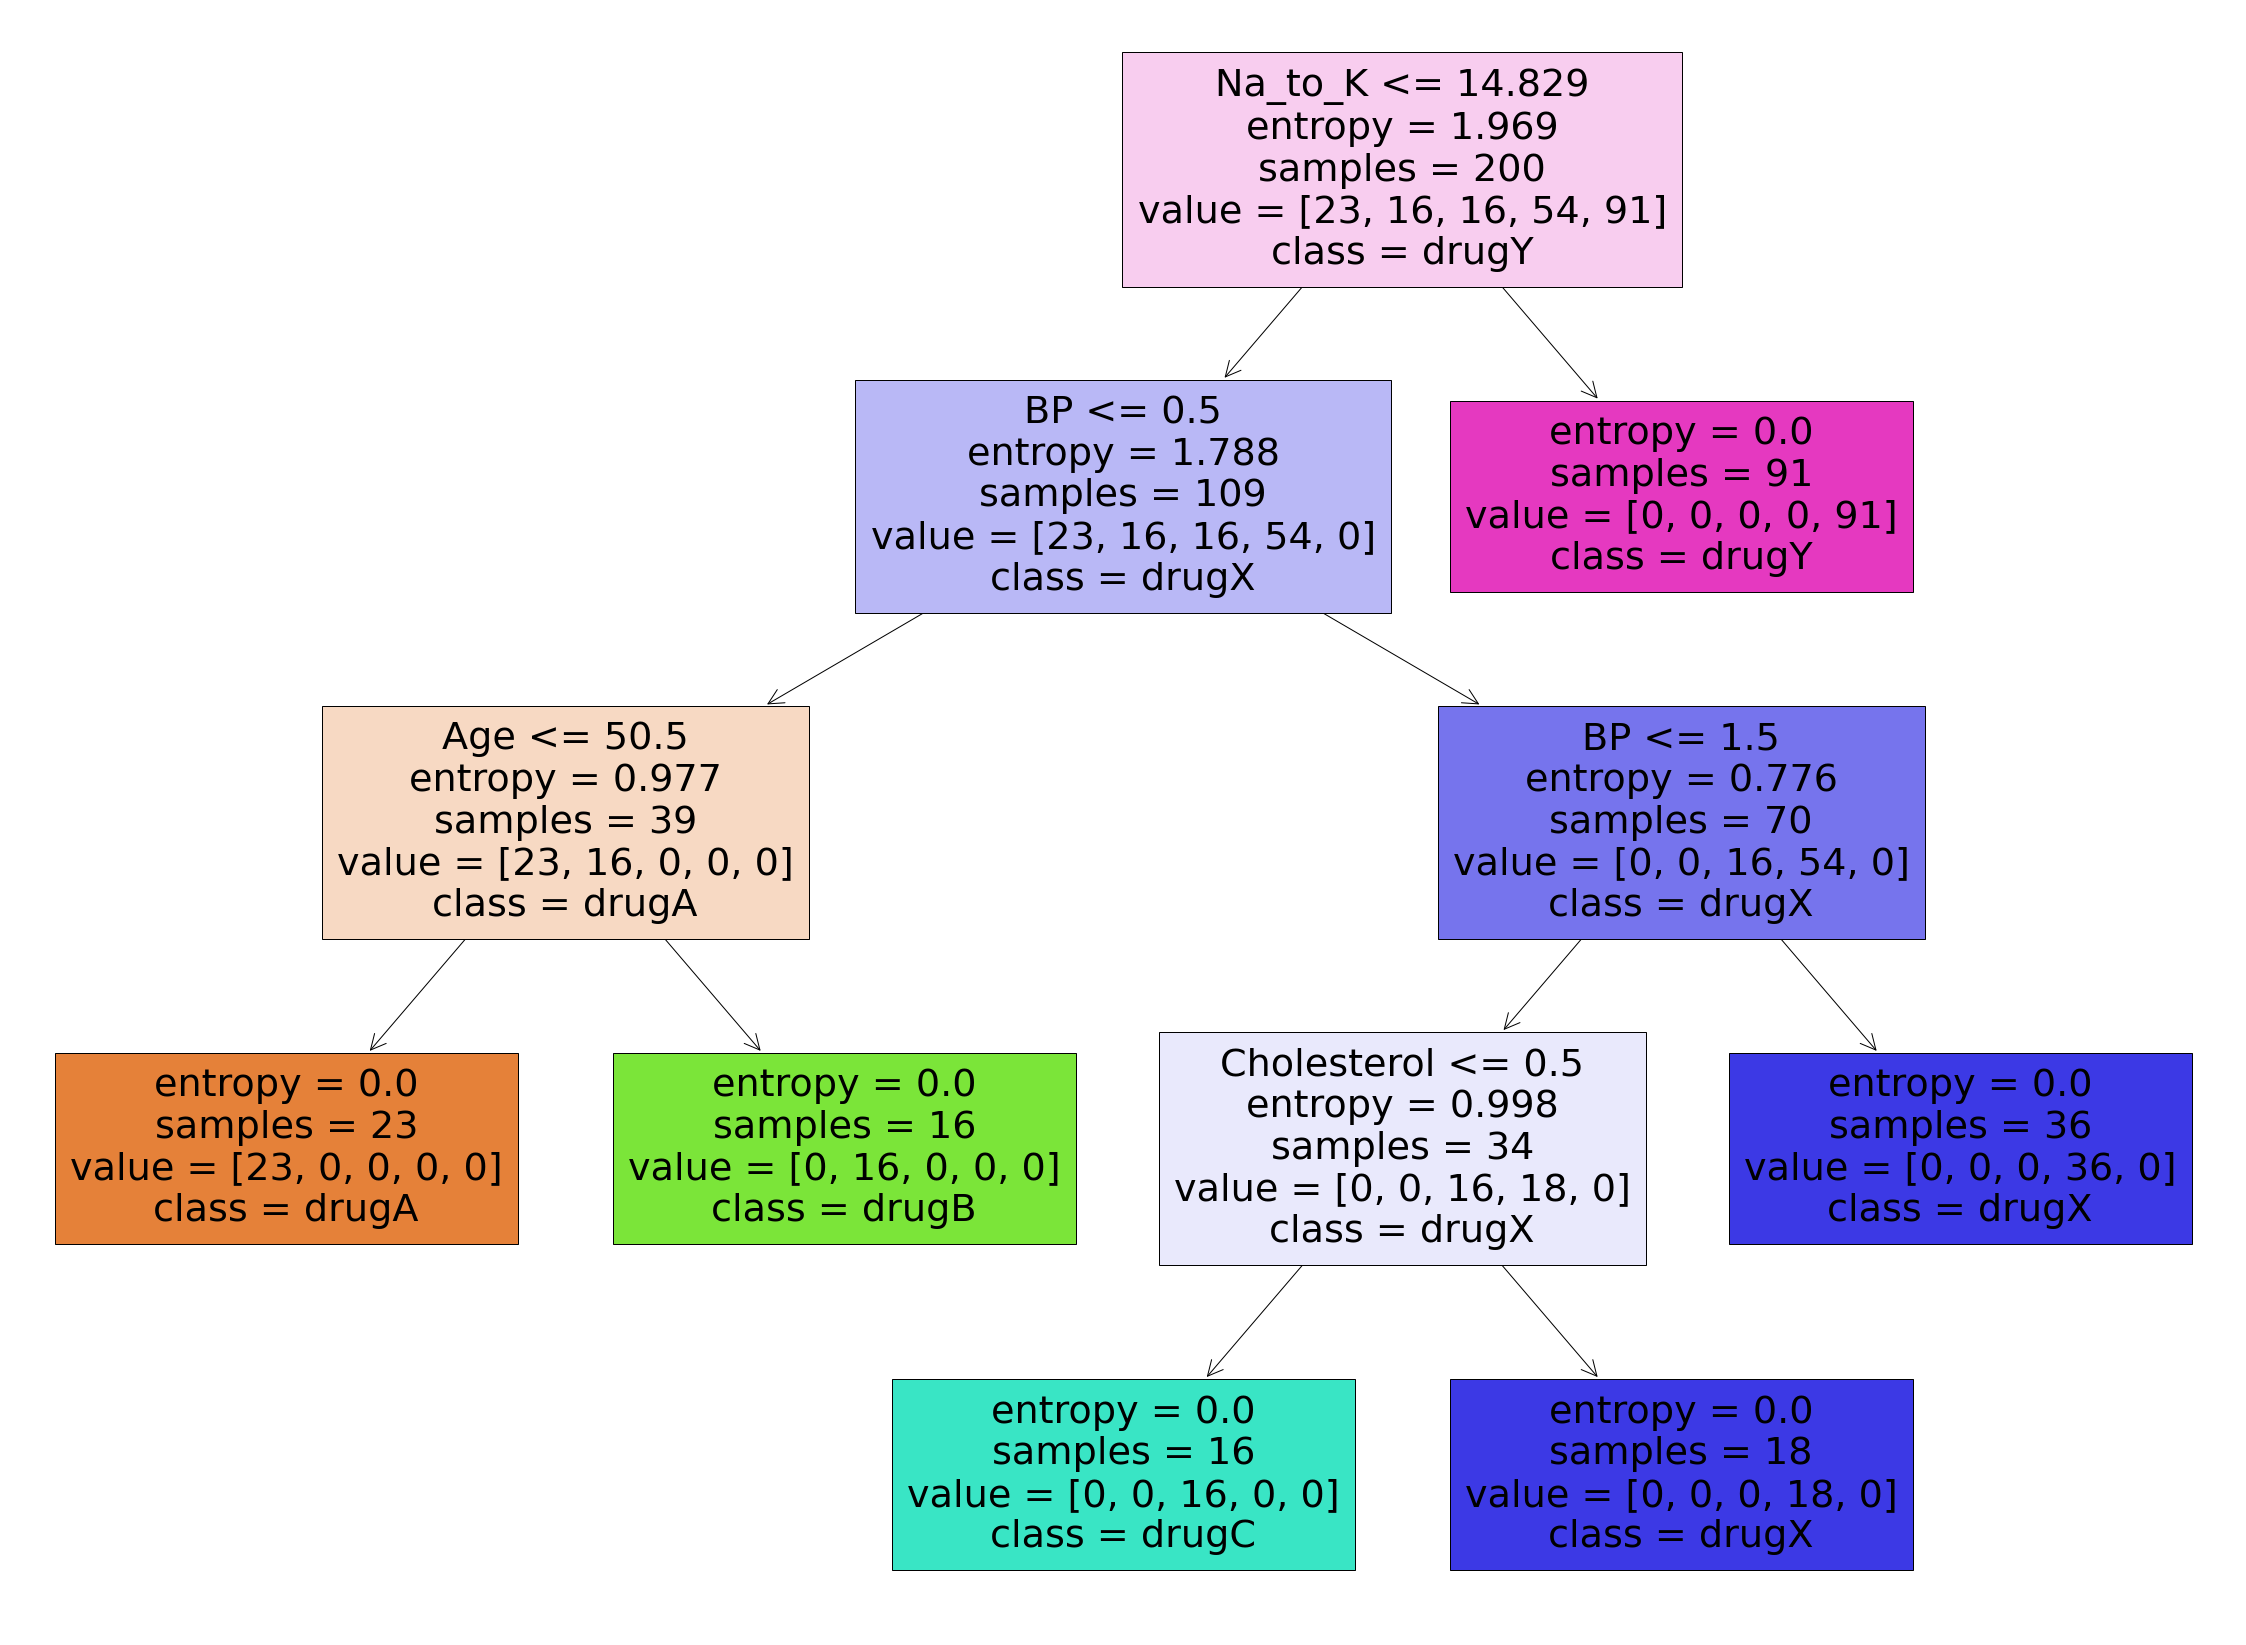

In [9]:
# Gera a figura
import matplotlib.pyplot as plt 

fig = plt.figure(figsize=(40,30))
_ = tree.plot_tree(model, 
                     feature_names= X.columns,  
                     class_names= np.unique(y),
                     filled=True)

8) Use a árvore de decisão para me indicar (método `predict`) qual remédio tomar:

**Paciente:** 
Rooney Coelho
* Age: 32
* Sexo: M
* BP: NORMAL
* Cholesterol: NORMAL
* Na_to_K: 12

*Obs: Não me passe o medicamento errado!*

In [10]:
rooney = model.predict(pd.DataFrame({'Age': [32], 'Sex': [1], 'BP': [2], 'Cholesterol': [1], 'Na_to_K': [12]}))
rooney

array(['drugX'], dtype=object)

9) Qual a feature mais importante para a árvore? Eu acho que é o sexo. Estou correto? Use o método `feature_importances_` para justificar seu ponto.

In [11]:
print("Você está errado, a feature mais importante é o Na_to_K!")
dict(zip(X.columns, model.feature_importances_))

Você está errado, a feature mais importante é o Na_to_K!


{'Age': 0.09673187007762218,
 'Sex': 0.0,
 'BP': 0.3121790387291627,
 'Cholesterol': 0.08613222418389217,
 'Na_to_K': 0.504956867009323}

## Segmentação dos dados e Validação do modelo

In [12]:
from sklearn.model_selection import train_test_split

10) Particione os dados em X_test e X_train para as features e y_train e y_test para os targets. Use a proporção padrão do método `train_test_split` para isso.

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=None)

11) Confira se a quantidade de linhas dos dados para teste e validação são iguais à dos dados antes da particão.

In [14]:
print(f'Quantidade de linhas de TESTE:',len(X_test))
print(f'Quantidade de linhas de TREINO:',len(X_train))

Quantidade de linhas de TESTE: 50
Quantidade de linhas de TREINO: 150


12) Treine o modelo com a partição referente ao treino das features e do target.

In [15]:
# Treinar o modelo
decisiontree = DecisionTreeClassifier()
model = decisiontree.fit(X_train, y_train)

13) Qual é o percentual de acertos do modelo? Utilize a partição dedicada à testes para isso (é perto de 100%)

In [16]:
# Percentual de acertos
from sklearn.metrics import accuracy_score
print ("A acurácia foi de {:.0f}%".format(accuracy_score(y_test, model.predict(X_test))*100))

A acurácia foi de 98%


14) Gere a matriz de confusão para mostrar as classificações incorretas. Use a forma de texto ou gere um gráfico para isso.

c:\users\vinip\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


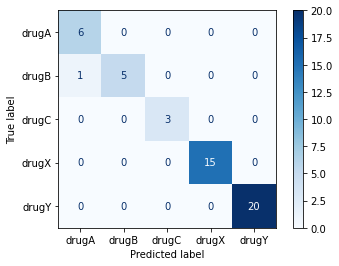

In [17]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, X_test, y_test, cmap = "Blues")

**Dica:** Use os dados segmentados para validar o modelo. Depois de confirmar que o modelo atende as espectativas, use a totalidade dos dados para o treinamento. Assim um novo dado a ser checadovai contemplar um modelo treinado com a integralidade dos dados.